In [1]:
import pyGM as gm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
D = np.genfromtxt('data/data.txt',delimiter=None)
loc = np.genfromtxt('data/locations.txt',delimiter=None)
edge = np.genfromtxt('data/edges.txt',delimiter=None)
m,n = D.shape

In [50]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos=dict(zip(G,loc)),with_labels = True)

    # show graph
    plt.show()

Calculating emprical probability:

In [51]:
x = np.zeros((n,2))
xy = np.zeros((n,n,2,2))
for j in range(0,n):
    for i in range(0,m):
        x[j][int(D[i,j])] += 1
x /= m
for j in range(0,m):
    for k in range(0,n):
        for p in range(k+1,n):
            xy[k][p][int(D[j,k])][int(D[j,p])]+=1
xy /= m

Calculating mutal information.

In [ ]:
E = np.zeros((n,n))
for i in range(0,n):
    for j in range(i+1,n):
        joint = xy[i,j,:]
        xx = x[i].reshape(2,1) *x[j]
        #print(x[i],x[j])
        #print(xx)
        #print(np.log(joint/xx))
        e = np.log(joint/xx)
        E[i][j] = np.sum(joint * e)

MST edges: 

[(0, 2), (1, 4), (2, 17), (2, 16), (3, 12), (3, 29), (3, 5), (4, 6), (5, 6), (7, 10), (7, 13), (8, 13), (9, 10), (10, 14), (11, 12), (11, 14), (13, 15), (17, 18), (17, 20), (18, 19), (20, 27), (21, 24), (21, 25), (21, 27), (22, 26), (22, 28), (22, 23), (27, 29), (28, 29)]
Graph for problem 1: 



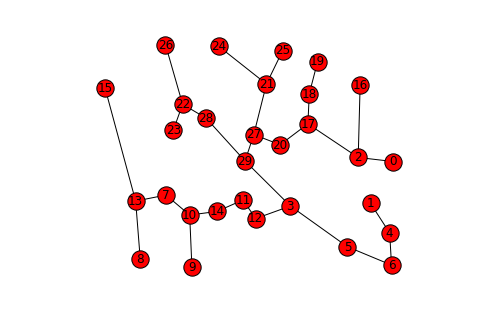

Graph for problem 2: 



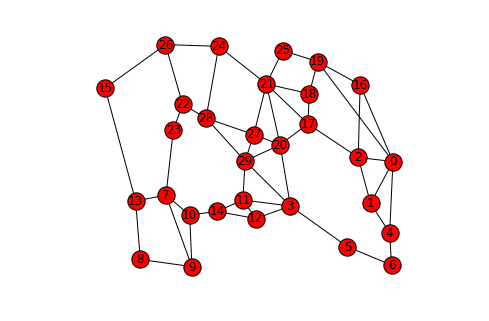

In [64]:
graph = -1 * E
G = nx.Graph(graph)
mst = nx.minimum_spanning_tree(G)
edges = mst.edges()
edge = edge.astype(int)
print('MST edges: \n')
print(edges)
print('Graph for problem 1: \n')
draw_graph(edges)
print('Graph for problem 2: \n')
draw_graph(edge)

Apparantly the graph of problem 2 has much more edges than MST in P1.

In [44]:
X = [gm.Var(i,2) for i in range(30)] 
factor = [gm.Factor([X[int(e[0])],X[int(e[1])]],1.0) for e in edge]

In [45]:
for i in range(len(factor)):
    factor[i].table = np.ones((2,2))
maxiterations = 10
like = np.zeros((maxiterations,))
it = 0
while (it < maxiterations):
    for i in range (0,len(edge)):
        model = gm.GraphModel(factor)
        pri = [1.0 for Xi in X]
        #print(i[0],i[1])
        a = int(edge[i][0])
        b = int(edge[i][1])
        pri[a], pri[b] = 2.0,2.0          # eliminate X1 and X3 last
        #print(pri)
        order = gm.eliminationOrder(model, orderMethod='minfill', priority=pri)[0]
        ###print (order,'\n')

        sumElim = lambda F,Xlist: F.sum(Xlist)   # helper function for eliminate
        model.eliminate(order[:-2], sumElim)  # eliminate all but last two

        p13 = model.joint()
        lnZ = np.log(p13.sum())   # can get the (log) partition function as well
        ###print ('lnZ: ',lnZ,'\n')
        p13 /= p13.sum()
        ##print (p13, '\n',p13.table)
        ##print(p13)
        factor[i].table = factor[i].table*(xy[a,b,:]/p13.table)
    l = 0
    ###print(model.logValue(D[0,:)
    model = gm.GraphModel(factor)
    for i in D:
        l += model.logValue(i)-lnZ  #compute log likelihood
    like[it] = l
    it += 1
        

C:\Users\suzey\OneDrive\Documents\cs274b\HW2\pyGM\factor.py:247: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.t[tuple(x[v] for v in self.v)]   # otherwise, find entry of table


In [46]:
print(like)
print(like/m)

[-29056.04464762 -26954.79021273 -26797.68311971 -26759.80012703
 -26750.59994997 -26748.68766999 -26748.30496462 -26748.2253873
 -26748.20804027 -26748.20410251]
[-10.52755241  -9.76622834  -9.70930548  -9.69557976  -9.69224636
  -9.6915535   -9.69141484  -9.69138601  -9.69137972  -9.6913783 ]


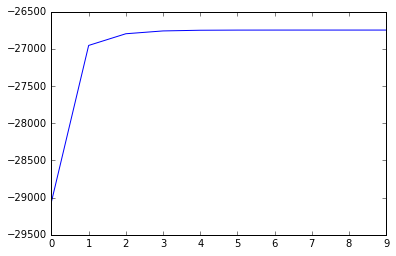

In [48]:
plt.plot(like)